# CNN Assignment :  Apply 3 different CNN's on the MNIST dataset

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
#Refer this link for making better CNN networks
#https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architecturespart-ii-hyper-parameter-42efca01e5d7
import warnings
warnings.filterwarnings("ignore")
#from __future__ import print_function
exec('from __future__ import absolute_import, division, print_function')
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# Preparing trainining and testing data
# input image dimensions
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print(x_train.shape)
if K.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   input_shape = (1, img_rows, img_cols)
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


11493376/11490434 [==============================] - 3s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [2]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334 # this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()


# Models with Conv , Max Pool and Dense Layer 

# Model 1 :  2 conv + 2 maxpoll+ 3 dense layers

In [3]:
import warnings
warnings.filterwarnings("ignore")
# In this (First Model) lets follow the general structure of the lenet we will make a simple model
# Network Architecture
# input -> conv -> polling -> conv -> polling -> FC -> FC -> output
# 8 16 120 84 10
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        3216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
________________________________________________

In [4]:
import warnings
warnings.filterwarnings("ignore")
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 287us/step - loss: 0.2721 - accuracy: 0.9219 - val_loss: 0.0698 - val_accuracy: 0.9765
Epoch 2/12
60000/60000 [==============================] - 18s 298us/step - loss: 0.0740 - accuracy: 0.9771 - val_loss: 0.0515 - val_accuracy: 0.9838
Epoch 3/12
60000/60000 [==============================] - 18s 298us/step - loss: 0.0528 - accuracy: 0.9838 - val_loss: 0.0404 - val_accuracy: 0.9859
Epoch 4/12
60000/60000 [==============================] - 18s 306us/step - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.0338 - val_accuracy: 0.9889
Epoch 5/12
60000/60000 [==============================] - 20s 332us/step - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0345 - val_accuracy: 0.9885
Epoch 6/12
60000/60000 [==============================] - 18s 300us/step - loss: 0.0294 - accuracy: 0.9903 - val_loss: 0.0421 - val_accuracy: 0.9864
Epoch 7/

Train score: 0.01593446881301449
Train accuracy: 99.4533360004425

************************ *********************

Test score: 0.046447735224399364
Test accuracy: 98.71000051498413


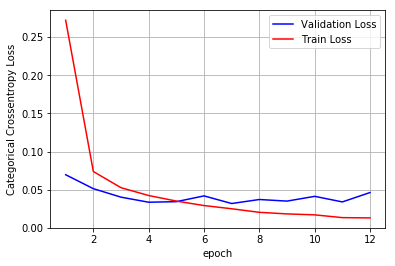

In [5]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Model 2 :  3 conv + 3 maxpoll+ 2 dense layers

In [6]:
import warnings
warnings.filterwarnings("ignore")
# go basic model to deep layer model
# Network Architecture
# input -> conv -> polling -> conv -> polling -> conv -> polling -> FC -> output
# 8 32 128 64
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.adam(),
metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

In [7]:
import warnings
warnings.filterwarnings("ignore")
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 48s 796us/step - loss: 0.3081 - accuracy: 0.9097 - val_loss: 0.0952 - val_accuracy: 0.9729
Epoch 2/12
60000/60000 [==============================] - 46s 766us/step - loss: 0.0917 - accuracy: 0.9721 - val_loss: 0.0805 - val_accuracy: 0.9736
Epoch 3/12
60000/60000 [==============================] - 45s 758us/step - loss: 0.0675 - accuracy: 0.9797 - val_loss: 0.0624 - val_accuracy: 0.9813
Epoch 4/12
60000/60000 [==============================] - 45s 750us/step - loss: 0.0539 - accuracy: 0.9836 - val_loss: 0.0514 - val_accuracy: 0.9841
Epoch 5/12
60000/60000 [==============================] - 45s 757us/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.0573 - val_accuracy: 0.9827
Epoch 6/12
60000/60000 [==============================] - 45s 757us/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0682 - val_accuracy: 0.9794
Epoch 7/12
60000/60000 [==============================] 

Train score: 0.011942215900942877
Train accuracy: 99.6150016784668

************************ *********************

Test score: 0.05009871911372902
Test accuracy: 98.50999712944031


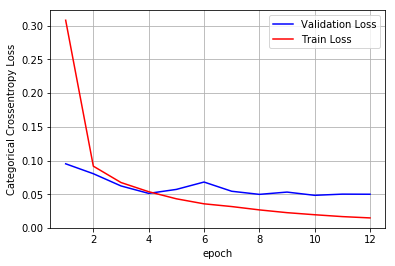

In [8]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Finally we train a model with the trend Conv-Conv-Pool-Conv-Conv-Pool

# Model 3 :  4 conv+ 2 maxpoll + 2 dense Layer 

In [9]:
# go basic model to deep layer model
# Network Architecture
# input -> conv -> conv -> polling -> conv -> conv -> polling -> FC -> output
# 16 16 32 32 512
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(Conv2D(16,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.adam(),
metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)              

In [10]:
import warnings
warnings.filterwarnings("ignore")
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1849 - accuracy: 0.9430 - val_loss: 0.0541 - val_accuracy: 0.9824
Epoch 2/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0485 - accuracy: 0.9848 - val_loss: 0.0321 - val_accuracy: 0.9892
Epoch 3/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0336 - val_accuracy: 0.9899
Epoch 4/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0236 - accuracy: 0.9922 - val_loss: 0.0330 - val_accuracy: 0.9887
Epoch 5/12
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.0259 - val_accuracy: 0.9913
Epoch 6/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0151 - accuracy: 0.9948 - val_loss: 0.0294 - val_accuracy: 0.9916
Epoch 7/12
60000/60000 [==============================] - 84s 1ms/st

Train score: 0.003995988390061666
Train accuracy: 99.85666871070862

************************ *********************

Test score: 0.03256005091774296
Test accuracy: 99.29999709129333


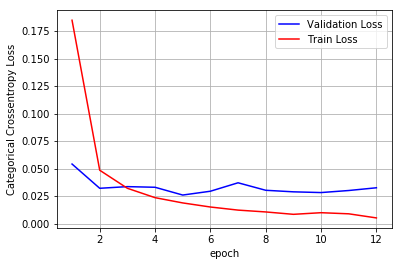

In [11]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


# Models included  Dropout

# Model 1 :  2 conv + 2 maxpoll+ 3 dense layer +Dropout (0.5)

In [12]:
#Same models with Dropouts
import warnings
warnings.filterwarnings("ignore")
# In this (First Model) lets follow the general structure of the lenet we will make a simple model
# Network Architecture
# input -> conv -> polling -> conv -> polling ->droupout-> FC -> FC -> output
# 8 16 120 84 10
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.adam(),
metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 16)        3216      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 120)              

In [13]:
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 276us/step - loss: 0.3910 - accuracy: 0.8756 - val_loss: 0.0814 - val_accuracy: 0.9738
Epoch 2/12
60000/60000 [==============================] - 18s 305us/step - loss: 0.1317 - accuracy: 0.9588 - val_loss: 0.0547 - val_accuracy: 0.9819
Epoch 3/12
60000/60000 [==============================] - 18s 303us/step - loss: 0.1035 - accuracy: 0.9679 - val_loss: 0.0398 - val_accuracy: 0.9868
Epoch 4/12
60000/60000 [==============================] - 18s 296us/step - loss: 0.0866 - accuracy: 0.9733 - val_loss: 0.0354 - val_accuracy: 0.9877
Epoch 5/12
60000/60000 [==============================] - 18s 296us/step - loss: 0.0780 - accuracy: 0.9757 - val_loss: 0.0317 - val_accuracy: 0.9898
Epoch 6/12
60000/60000 [==============================] - 18s 295us/step - loss: 0.0688 - accuracy: 0.9787 - val_loss: 0.0368 - val_accuracy: 0.9881
Epoch 7/12
60000/60000 [==============================] 

Train score: 0.017866180427525736
Train accuracy: 99.43666458129883

************************ *********************

Test score: 0.02355184760145494
Test accuracy: 99.11999702453613


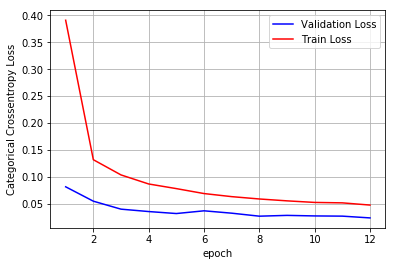

In [14]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


# Model 2 :  3 conv + 3 maxpoll+ 2 dense layers + Dropout (0.9)

In [15]:
import warnings
warnings.filterwarnings("ignore")
# go basic model to deep layer model
# Network Architecture
# input -> conv -> polling -> conv -> polling -> conv -> polling ->dropout-> FC -> output
# 8 32 128 64
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Dropout(0.9))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.adam(),
metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 128)        

In [16]:
history=model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 44s 741us/step - loss: 1.3356 - accuracy: 0.5181 - val_loss: 0.2980 - val_accuracy: 0.9365
Epoch 2/12
60000/60000 [==============================] - 45s 747us/step - loss: 0.8161 - accuracy: 0.7112 - val_loss: 0.1750 - val_accuracy: 0.9537
Epoch 3/12
60000/60000 [==============================] - 45s 752us/step - loss: 0.6775 - accuracy: 0.7623 - val_loss: 0.1483 - val_accuracy: 0.9616
Epoch 4/12
60000/60000 [==============================] - 45s 751us/step - loss: 0.6011 - accuracy: 0.7896 - val_loss: 0.1250 - val_accuracy: 0.9640
Epoch 5/12
60000/60000 [==============================] - 45s 748us/step - loss: 0.5565 - accuracy: 0.8058 - val_loss: 0.1123 - val_accuracy: 0.9697
Epoch 6/12
60000/60000 [==============================] - 46s 761us/step - loss: 0.5184 - accuracy: 0.8206 - val_loss: 0.1050 - val_accuracy: 0.9705
Epoch 7/12
60000/60000 [==============================] 

In [17]:
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

# Model 3 :  4 conv + 2 maxpoll+ 2 dense layers + Dropout (0.3)

In [18]:

# go basic model to deep layer model
# Network Architecture
# input -> conv -> conv -> polling -> conv -> conv -> polling ->dropout-> FC -> output
# 16 16 32 32 512
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(Conv2D(16,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.adam(),
metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 32)         

In [19]:
history=model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2103 - accuracy: 0.9357 - val_loss: 0.0499 - val_accuracy: 0.9849
Epoch 2/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0618 - accuracy: 0.9807 - val_loss: 0.0332 - val_accuracy: 0.9881
Epoch 3/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0422 - accuracy: 0.9871 - val_loss: 0.0282 - val_accuracy: 0.9905
Epoch 4/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0350 - accuracy: 0.9891 - val_loss: 0.0250 - val_accuracy: 0.9914
Epoch 5/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0217 - val_accuracy: 0.9921
Epoch 6/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0241 - accuracy: 0.9919 - val_loss: 0.0277 - val_accuracy: 0.9923
Epoch 7/12
60000/60000 [==============================] - 80s 1ms/st

Train score: 0.0033918453480264966
Train accuracy: 99.91166591644287

************************ *********************

Test score: 0.017945763700317457
Test accuracy: 99.43000078201294


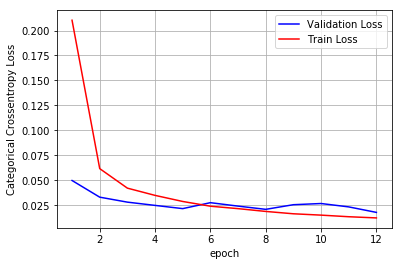

In [20]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# CONCLUSION:

In [21]:
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= ("conv_layers", "MAxPoll_layers", "Dense_layers","Dropout","Accuracy")
tb.add_row(["2", "2","3","NO",98.71])
tb.add_row(["3", "3","2","NO",98.51])
tb.add_row(["4", "2","2","NO",99.29])
tb.add_row(["2", "2","3","0.5",99.12])
tb.add_row(["3", "3","2","0.9",97.47])
tb.add_row(["4", "2","2","0.3",99.43])

print(tb.get_string(titles = "CNN Models - Observations"))

+-------------+----------------+--------------+---------+----------+
| conv_layers | MAxPoll_layers | Dense_layers | Dropout | Accuracy |
+-------------+----------------+--------------+---------+----------+
|      2      |       2        |      3       |    NO   |  98.71   |
|      3      |       3        |      2       |    NO   |  98.51   |
|      4      |       2        |      2       |    NO   |  99.29   |
|      2      |       2        |      3       |   0.5   |  99.12   |
|      3      |       3        |      2       |   0.9   |  97.47   |
|      4      |       2        |      2       |   0.3   |  99.43   |
+-------------+----------------+--------------+---------+----------+


**All the 3 different architectures  performed good with accuracy of 98 % Plus and  it is also observed that  regularizers like drop out resulted in  accuracy of 99 % plus**
